# TASK 2  Machine Learning Intern @Codsoft 

# CUSTOMER CHURN PREDICTION
OBJECTIVES:- Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

# 1) Import necessary libraries 🐍 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
import sklearn.svm as SVM 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score , classification_report  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# 2) Load Dataset & Data Preprocessing 🔄🔢

In [2]:
Data=pd.read_csv("Churn_Modelling.csv") 
Data 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#check shape of Dataset 
Data.shape 

(10000, 14)

In [4]:
Data.columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Check sample data in our Dataset
Data.sample()  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8036,8037,15807221,Weaver,555,Spain,Male,21,1,0.0,2,0,0,103901.35,0


# 3) EDA (Exploratory Data Analysis )🚀 

In [6]:
#Check info of Dataset 
Data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Check null value in our Dataset 
Data.isnull().sum()  

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null value in our dataset 

In [8]:
#Check Duplicated values in our dataset 
Data.duplicated().sum()   

0

No duplicated value in our dataset 

In [9]:
# Summary statistics 
Data.describe()   

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Class distribution
Data['Exited'].value_counts()  

Exited
0    7963
1    2037
Name: count, dtype: int64

# 4)Data Visualization 📊📈📉

<Axes: xlabel='Exited', ylabel='count'>

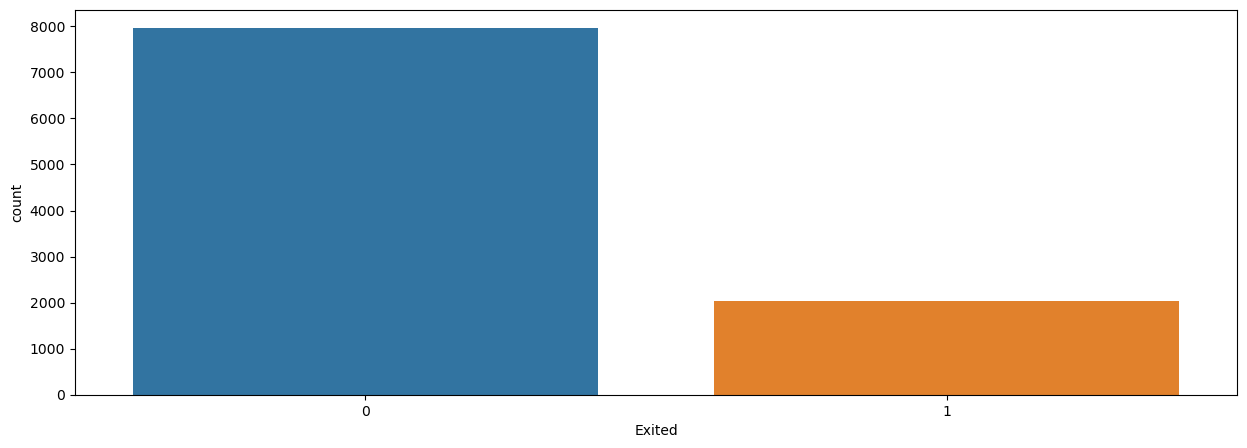

In [11]:
plt.figure(figsize=(15,5))
sn.countplot(data=Data,x='Exited')      

In [12]:
 Data.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender'],axis=1,inplace=True) 

In [13]:
Data.head(3) 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [14]:
Data.corr() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# Heatmap 🌡️

<Axes: >

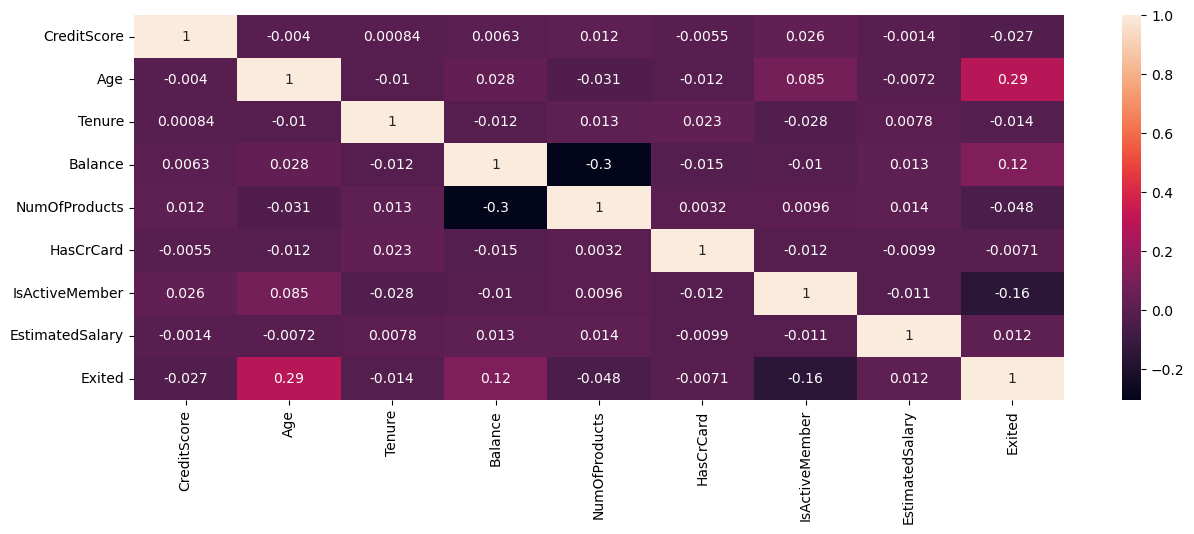

In [15]:
plt.figure(figsize=(15,5))
sn.heatmap(Data.corr(),annot=True) 

In [16]:
Data_corr_exit=Data.corr()['Exited'].to_frame()  
Data_corr_exit 

,Exited
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000


# Barplot📊 

<Axes: ylabel='Exited'>

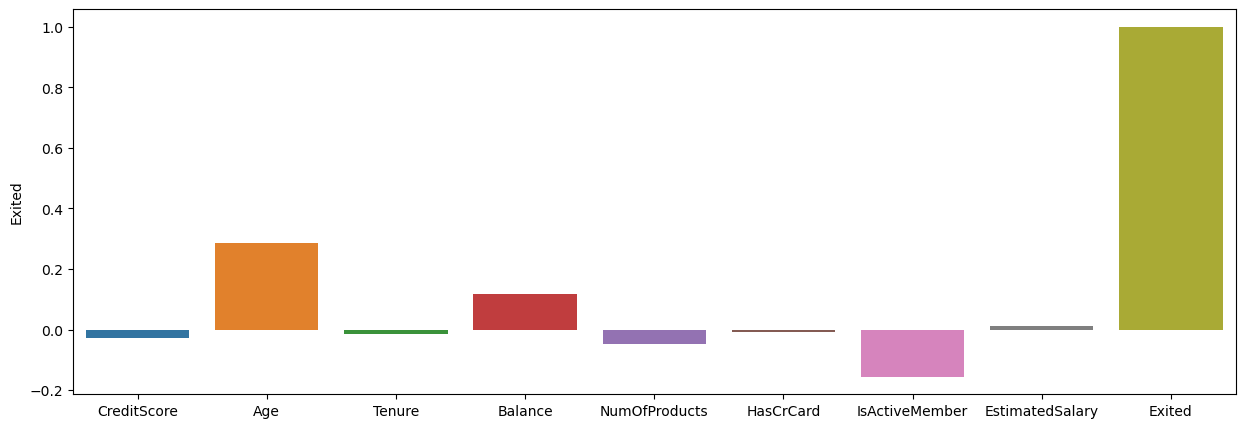

In [17]:
plt.figure(figsize=(15,5))
sn.barplot(data=Data_corr_exit,x=Data_corr_exit.index,y='Exited') 

# 5) Models Training / Building 📈 

In [18]:
x=Data.drop(['Exited'],axis=1)
y=Data['Exited'] 

In [24]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
#Spliting the Data Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
#LogisticRegression model 
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)  

LogisticRegression(max_iter=500)

In [23]:
# Train a Random Forest model
rf_model = RandomForestClassifier() 
rf_model.fit(x_train, y_train) 

RandomForestClassifier()

In [25]:
# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)  

GradientBoostingClassifier()

In [26]:
# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Confusion Matrix:\n", cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [27]:
print("Logistic Regression Model:")
evaluate_model(lr, x_test, y_test)

Logistic Regression Model:
Confusion Matrix:
 [[1539  877]
 [ 148  436]]
Accuracy: 0.6583333333333333
Precision: 0.33206397562833206
Recall: 0.7465753424657534
F1 Score: 0.45967316816025305


C:\Users\Shubhajinkya\Sukhada\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
print("Random Forest Model:")
evaluate_model(rf_model, x_test, y_test) 

Random Forest Model:
Confusion Matrix:
 [[   0 2416]
 [   2  582]]
Accuracy: 0.194
Precision: 0.1941294196130754
Recall: 0.9965753424657534
F1 Score: 0.32495812395309887


C:\Users\Shubhajinkya\Sukhada\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
print("Gradient Boosting Model:")
evaluate_model(gb_model, x_test, y_test) 

Gradient Boosting Model:
Confusion Matrix:
 [[2348   68]
 [ 330  254]]
Accuracy: 0.8673333333333333
Precision: 0.7888198757763976
Recall: 0.4349315068493151
F1 Score: 0.5607064017660044


# 6) Accuracy 🎯💯🚀 

# I got a Accuracy Score: 0.86 (86%)  